# Part 1: Python Fundamentals (5 min)
**Today: Mixed practice - Write a function that:**
- takes a list of numbers, 
- returns a dictionary with keys 'above_mean', 'below_mean', 'at_mean' 
- and lists of values for each category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
list1 = [1,3,4,7,8,9,22,45,6,21,88,99,35,22,36,11,2]
list2 = [2,4,6,8,10,12,14,16,18,20,40,60,80,100]

def list_to_dict(x): # function needs to calculate mean in order to sort list into buckets
    new_dict = {'above_mean':[],'below_mean':[],'at_mean':[]}
    mean = int((sum(x)/len(x)))
    std = np.std(x)
    for val in x:
        if val in range(mean-7,mean+7):
            new_dict['at_mean'].append(val)
        elif val < mean:
            new_dict['below_mean'].append(val)
        else:
            new_dict['above_mean'].append(val)
    return print(f"Original list: {sorted(x)}\nOriginal mean: {mean}\n{new_dict}")

list_to_dict(list1)
print('='*30)
list_to_dict(list2)

Original list: [1, 2, 3, 4, 6, 7, 8, 9, 11, 21, 22, 22, 35, 36, 45, 88, 99]
Original mean: 24
{'above_mean': [45, 88, 99, 35, 36], 'below_mean': [1, 3, 4, 7, 8, 9, 6, 11, 2], 'at_mean': [22, 21, 22]}
Original list: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 40, 60, 80, 100]
Original mean: 27
{'above_mean': [40, 60, 80, 100], 'below_mean': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'at_mean': [20]}


# Part 2: Pandas Tier 1 Rep (5 min)
**Challenge sequence:** 
Load → create calculated column → filter on that new column → groupby with multiple aggs → flatten MultiIndex columns

In [3]:
df = pd.read_csv('../../data/raw/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65
3,6448,https://www.airbnb.com/rooms/6448,20250613040113,2025-06-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.02
4,8502,https://www.airbnb.com/rooms/8502,20250613040113,2025-06-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.69,4.63,NaN,f,1,1,0,0,0.29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

In [5]:
df['avg_per_night_revenue'] = (df['estimated_revenue_l365d'].replace(0, df['estimated_revenue_l365d'].median()))/(df['availability_365'].replace(0, df['availability_365'].median()))
df.sort_values('avg_per_night_revenue',ascending=False).head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_per_night_revenue
9128,868630470918063876,https://www.airbnb.com/rooms/868630470918063876,20250613040113,2025-06-13,city scrape,"3/3 SoLa, 5 queen beds, Pool & Hot Tub, Sleeps 10",SoLa House is a modern oasis just off South La...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,4190698,...,4.84,4.65,NaN,f,1,1,0,0,2.59,53664.000000
8591,813711378507210342,https://www.airbnb.com/rooms/813711378507210342,20250613040113,2025-06-13,city scrape,Perfect Retreat + Pool + Cedar Hot Tub + Sleep...,"Escape to this peaceful, one-of-a-kind propert...","The home is located in a quiet, spacious, and ...",https://a0.muscache.com/pictures/prohost-api/H...,6256882,...,4.86,4.84,NaN,t,3,3,0,0,2.72,27324.000000
11581,1147207983939619570,https://www.airbnb.com/rooms/1147207983939619570,20250613040113,2025-06-13,city scrape,Perfect Spot for Unwinding! Outdoor Pool!,"Nestled on the shores of Lake Travis, the Lake...",Lakeway Country Club 0.9 mile;<br />Hills Coun...,https://a0.muscache.com/pictures/prohost-api/H...,501999278,...,4.92,4.85,NaN,t,90,0,0,0,1.10,22033.898305


In [6]:
df[df['avg_per_night_revenue']>200].head(4)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_per_night_revenue
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.77,4.92,NaN,f,1,0,1,0,1.65,337.500000
21,78035,https://www.airbnb.com/rooms/78035,20250613040113,2025-06-13,city scrape,Modern Gem featured by Dwell. Pool + HotTub.,Recently featured by Dwell. <br /><br />Singl...,Zilker Neighborhood is surrounded by some of t...,https://a0.muscache.com/pictures/c8f77fad-006b...,419192,...,4.96,4.78,NaN,f,2,2,0,0,0.90,228.290323
100,345473,https://www.airbnb.com/rooms/345473,20250613040113,2025-06-13,city scrape,Exquisite SoCo Cottage near Shops and Restaurants,Soak up a blend of modern and vintage charm in...,The house is just three blocks off the main st...,https://a0.muscache.com/pictures/hosting/Hosti...,1751224,...,4.97,4.87,NaN,f,1,1,0,0,1.78,421.372549
106,349635,https://www.airbnb.com/rooms/349635,20250613040113,2025-06-13,city scrape,Central Austin Bed and Private bath 78703,Just a bed and bath with a private entrance. <...,it is a quiet safe neighborhood. very walkable...,https://a0.muscache.com/pictures/61482348/c926...,1771402,...,4.90,4.73,NaN,f,2,1,1,0,0.52,768.000000


In [7]:
df.groupby('listing_url').agg({'bedrooms':'mean','beds':'mean'})

,bedrooms,beds
listing_url,,
https://www.airbnb.com/rooms/1000016109686428185,5.0,11.0
https://www.airbnb.com/rooms/1000214231632561366,0.0,1.0
https://www.airbnb.com/rooms/1000683736790987890,3.0,NaN
https://www.airbnb.com/rooms/1000797929335000571,3.0,4.0
https://www.airbnb.com/rooms/1000866089852243253,3.0,5.0
...,...,...
https://www.airbnb.com/rooms/999392976175079147,3.0,3.0
https://www.airbnb.com/rooms/999463364304119916,2.0,2.0
https://www.airbnb.com/rooms/999566439801469520,3.0,4.0


# Part 3: Visualization Practice (5-10 min)
**Speed drill:**
*Create all three*
(histogram, boxplot, scatter) on same data in under 10 minutes total

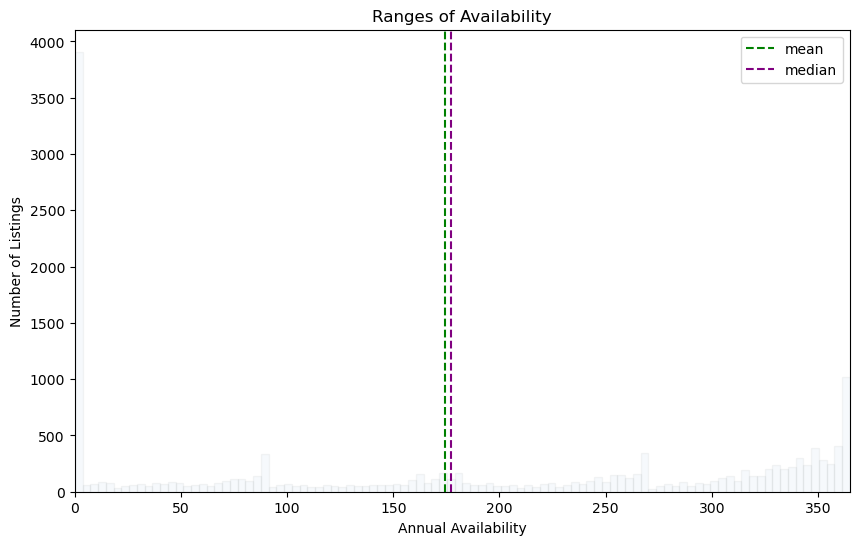

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['availability_365'], bins=100, edgecolor='black', alpha=0.04)
plt.xlim(df['availability_365'].min(), df['availability_365'].max())
plt.axvline(df['availability_365'].mean(), color='green', linestyle='--', label='mean')
plt.axvline(df['availability_365'].median(), color='purple', linestyle='--', label='median')
plt.xlabel('Annual Availability')
plt.ylabel('Number of Listings')
plt.title('Ranges of Availability')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

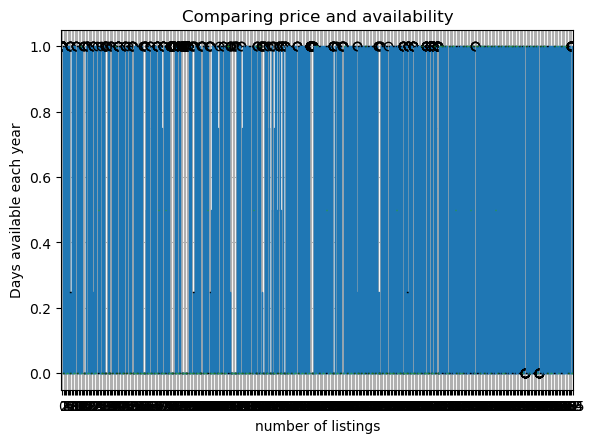

In [9]:
df['can'] = df['instant_bookable']=='t'

plt.figure(figsize=(10,6))
df.boxplot(column='can', by='availability_365')
plt.suptitle('')
plt.title('Comparing price and availability')
plt.xlabel('number of listings')
plt.ylabel('Days available each year')
plt.show()